In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [2]:
df = pd.read_csv('../data/survey_clean_rick_renamed.csv')
df.head()

,Age,Height,Weight,fam_hx_overweight,high_cal_foods,vegetables,main_meals,smoke,H2O,monitor_cals,...,food_bw_meals_Frequently,food_bw_meals_Sometimes,food_bw_meals_no,alcohol_Frequently,alcohol_Sometimes,alcohol_no,transport_Bike,transport_Motorbike,transport_Public,transport_Walking
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,0,1,0,0,1,0,0,0,1,0
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,0,1,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,0,1,0,0,1,0,0,0,1,0


In [3]:
X = df.drop(columns = ['Weight', 'obesity'])
y = df['obesity']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [5]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [6]:
print(f'Train: {logreg.score(X_train, y_train)}')
print(f'Test: {logreg.score(X_test, y_test)}')

Train: 0.8888186986734049
Test: 0.8920454545454546


In [7]:
predslog = logreg.predict(X_test)

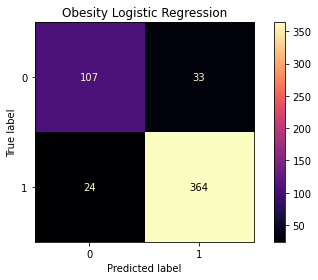

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, predslog, 
                                        cmap = 'magma',
                                       )
plt.title('Obesity Logistic Regression')

plt.tight_layout()
plt.savefig('../images/logreg_simple_cmatrix');

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
print(f'Train: {rf.score(X_train, y_train)}')
print(f'Test: {rf.score(X_test, y_test)}')

Train: 1.0
Test: 0.9242424242424242


In [11]:
predsrf = rf.predict(X_test)

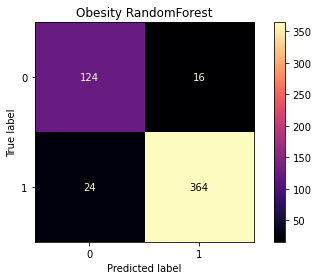

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test, predsrf, 
                                        cmap = 'magma',
                                       )
plt.title('Obesity RandomForest')

plt.tight_layout()
plt.savefig('../images/rf_simple_cmatrix');

In [13]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [14]:
print(f'Train: {ada.score(X_train, y_train)}')
print(f'Test: {ada.score(X_test, y_test)}')

Train: 0.8970309538850284
Test: 0.8863636363636364


In [15]:
predsada = ada.predict(X_test)

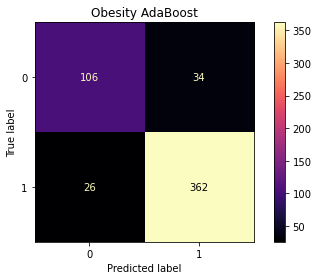

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, predsada, 
                                        cmap = 'magma',
                                       )
plt.title('Obesity AdaBoost')

plt.tight_layout()
plt.savefig('../images/ada_simple_cmatrix');

In [17]:
gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)

GradientBoostingClassifier()

In [18]:
print(f'Train: {gr.score(X_train, y_train)}')
print(f'Test: {gr.score(X_test, y_test)}')

Train: 0.9538850284270373
Test: 0.9128787878787878


In [19]:
predsgr = gr.predict(X_test)

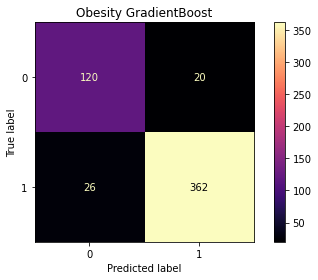

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, predsgr, 
                                        cmap = 'magma',
                                       )
plt.title('Obesity GradientBoost')

plt.tight_layout()
plt.savefig('../images/gr_simple_cmatrix');

______
## Feature Engineering

In [21]:
X = df.drop(columns = ['Weight', 'obesity'])
y = df['obesity']

In [22]:
X['Height^2'] = X['Height'] ** 2
X['Age^2'] = X['Age'] ** 2
X['physical_activity^2'] = X['physical_activity'] ** 2

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [24]:
gr2 = GradientBoostingClassifier()
gr2.fit(X_train, y_train)

GradientBoostingClassifier()

In [25]:
print(f'Train: {gr2.score(X_train, y_train)}')
print(f'Test: {gr2.score(X_test, y_test)}')

Train: 0.9538850284270373
Test: 0.9109848484848485


In [26]:
predsgr2 = gr2.predict(X_test)

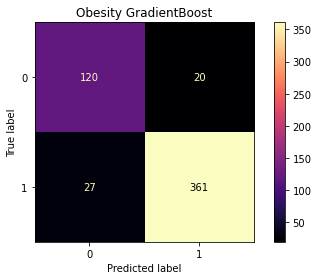

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, predsgr2, 
                                        cmap = 'magma',
                                       )
plt.title('Obesity GradientBoost')

plt.tight_layout()
plt.savefig('../images/gr_simple_poly_cmatrix');

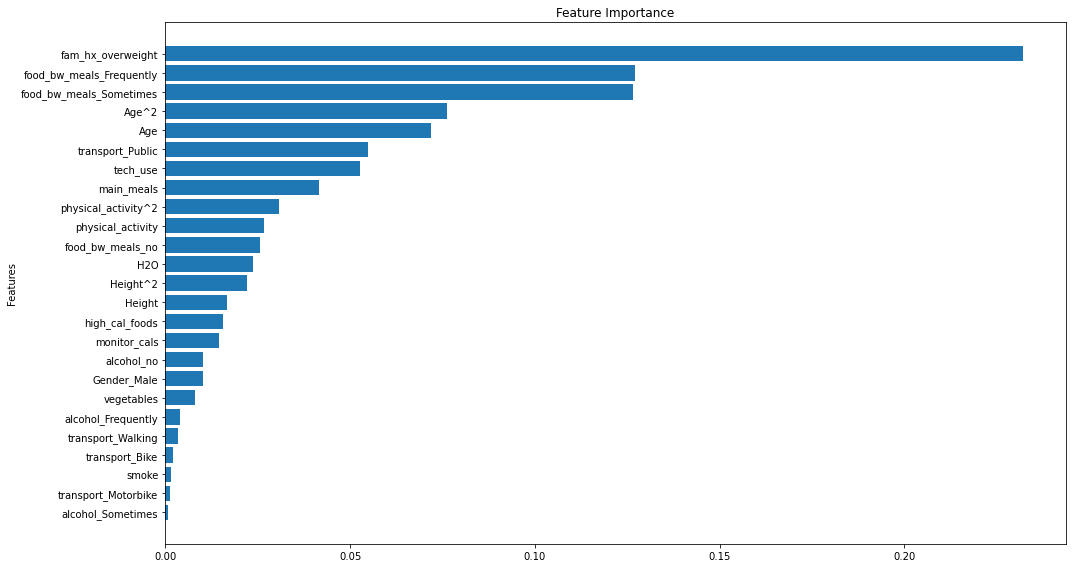

In [28]:
plt.figure(figsize = (15,8))
test1 = pd.DataFrame(gr2.feature_importances_, index = X.columns, columns = ['value'])
test1 = test1.sort_values(by = 'value')

plt.barh(y = test1.index, width = test1['value'])
#test1.sort_values(by = 'value', ascending = True).plot.barh()
plt.title("Feature Importance")
plt.ylabel("Features")
plt.tight_layout();
plt.savefig('../images/gr_simple_poly_feature_importance');

In [29]:
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
print(f'Train: {rf2.score(X_train, y_train)}')
print(f'Test: {rf2.score(X_test, y_test)}')

Train: 1.0
Test: 0.9299242424242424


In [31]:
predsrf2 = rf2.predict(X_test)

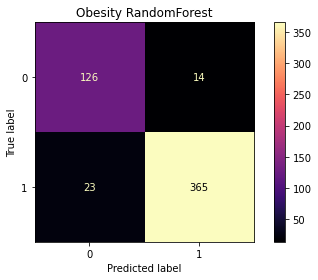

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, predsrf2, 
                                        cmap = 'magma',
                                       )
plt.title('Obesity RandomForest')

plt.tight_layout()
plt.savefig('../images/rf_simple_poly_cmatrix');

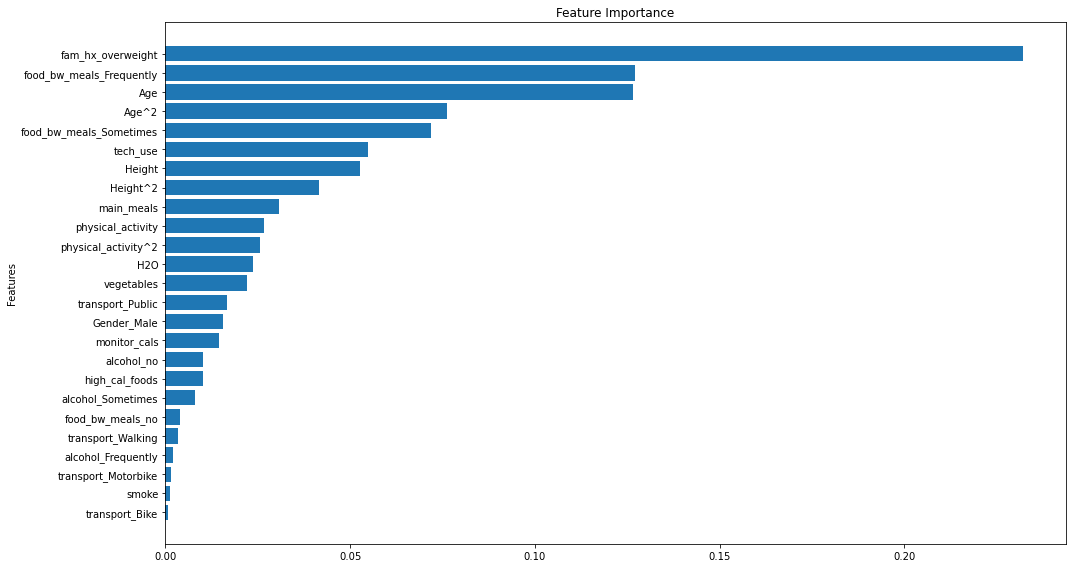

In [33]:
plt.figure(figsize = (15,8))
test2 = pd.DataFrame(rf2.feature_importances_, index = X.columns, columns = ['value'])
test2 = test2.sort_values(by = 'value')

plt.barh(y = test2.index, width = test1['value'])
#test1.sort_values(by = 'value', ascending = True).plot.barh()
plt.title("Feature Importance")
plt.ylabel("Features")
plt.tight_layout();
plt.savefig('../images/rf_simple_poly_feature_importance');

In [39]:
ada2 = AdaBoostClassifier()
ada2.fit(X_train, y_train)

AdaBoostClassifier()

In [40]:
print(f'Train: {ada2.score(X_train, y_train)}')
print(f'Test: {ada2.score(X_test, y_test)}')

Train: 0.8970309538850284
Test: 0.8863636363636364


In [41]:
predsada2 = ada2.predict(X_test)

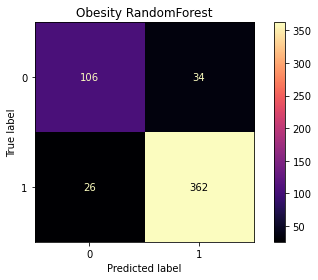

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, predsada2, 
                                        cmap = 'magma',
                                       )
plt.title('Obesity RandomForest')

plt.tight_layout()
plt.savefig('../images/ada_simple_poly_cmatrix');

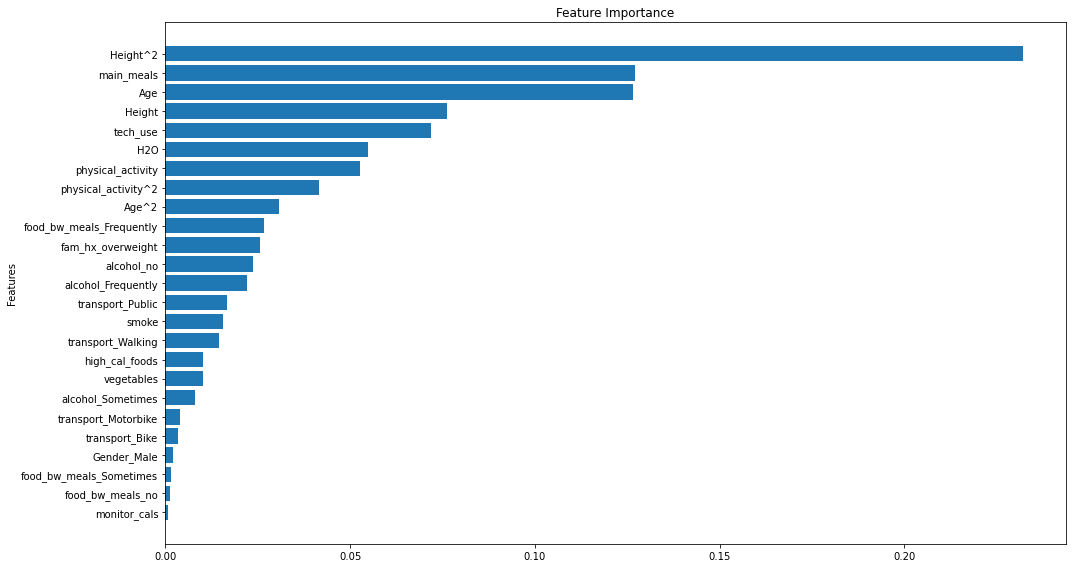

In [43]:
plt.figure(figsize = (15,8))
test2 = pd.DataFrame(ada2.feature_importances_, index = X.columns, columns = ['value'])
test2 = test2.sort_values(by = 'value')

plt.barh(y = test2.index, width = test1['value'])
#test1.sort_values(by = 'value', ascending = True).plot.barh()
plt.title("Feature Importance")
plt.ylabel("Features")
plt.tight_layout();
plt.savefig('../images/ada_simple_poly_feature_importance');